## Advertising Effectiveness Analysis  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('advertising.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.shape

(200, 4)

In [7]:
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [TV, Radio, Newspaper, Sales]
Index: []


C:\Users\OBULI RAJAN V\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


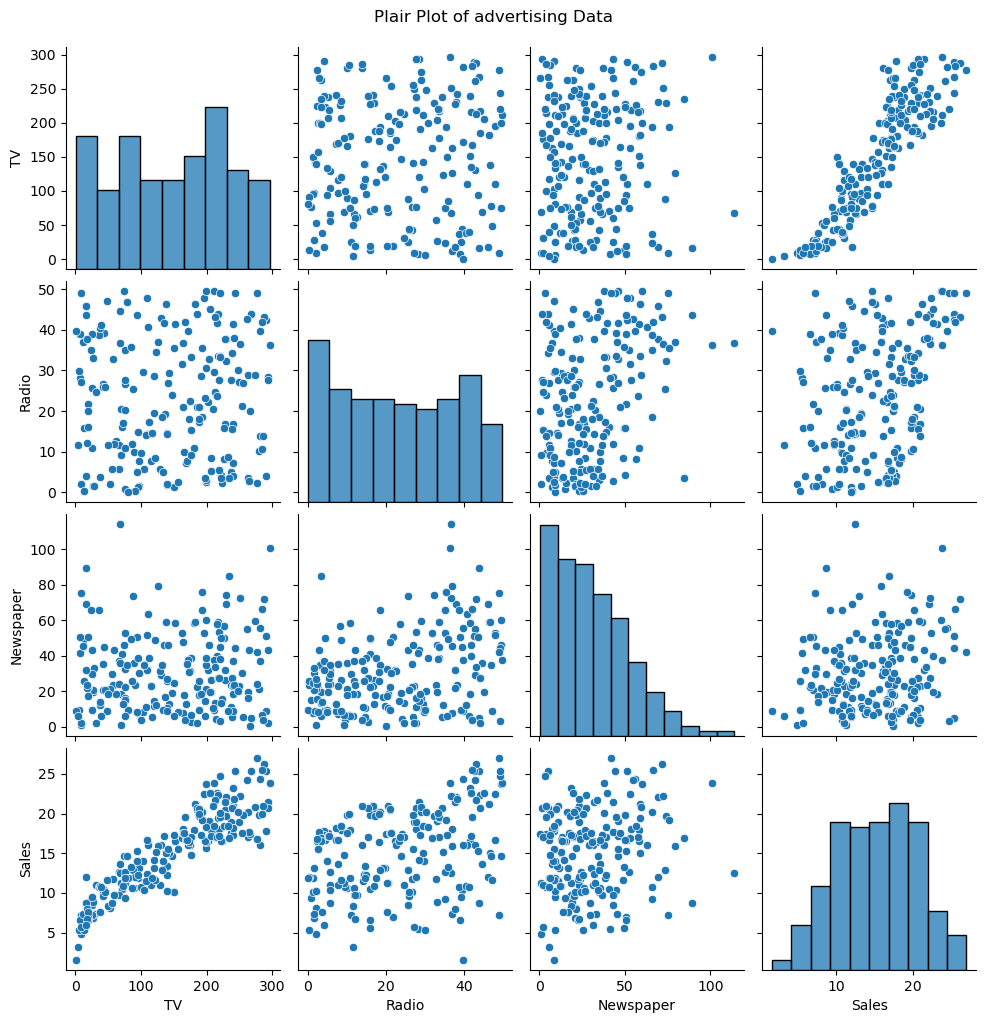

In [8]:
sns.pairplot(df)
plt.suptitle('Plair Plot of advertising Data', y=1.02)
plt.show()

In [13]:
sales_outliers = df['Sales'].quantile(0.95)
df_cleaned = df[df['Sales']<= sales_outliers]

In [28]:
from sklearn.model_selection import train_test_split


In [30]:
x_cleaned = df_cleaned[['TV', 'Radio', 'Newspaper']]
y_cleaned = df_cleaned['Sales']
x_train_cleaned, x_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(x_cleaned, y_cleaned, test_size=0.2, random_state=42)


In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
model_cleaned = LinearRegression()
model_cleaned.fit(x_train_cleaned, y_train_cleaned)

LinearRegression()

In [37]:
predictions_cleaned = model_cleaned.predict(x_test_cleaned)

In [39]:
from sklearn.metrics import mean_squared_error

In [40]:
mse_cleaned = mean_squared_error(y_test_cleaned, predictions_cleaned)
print(f'Mean Squared Error (Cleaned): {mse_cleaned}')

Mean Squared Error (Cleaned): 3.394628534511452


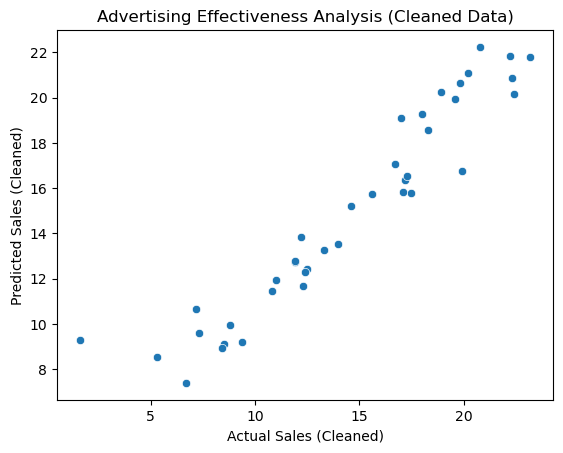

In [41]:
sns.scatterplot(x=y_test_cleaned, y=predictions_cleaned)
plt.xlabel('Actual Sales (Cleaned)')
plt.ylabel('Predicted Sales (Cleaned)')
plt.title('Advertising Effectiveness Analysis (Cleaned Data)')
plt.show()